<a href="https://colab.research.google.com/github/MeeTK26/30DaysOfMLDL/blob/main/MnistUsingSVMData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [7]:
df=pd.read_csv('mnist_train.csv')

df_test=pd.read_csv('mnist_test.csv')

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
y=df['label'].values
y_test=df_test['label'].values

In [4]:
X=np.array(df.drop('label',axis=1))
X_test=np.array(df_test.drop('label',axis=1))

In [5]:
X=X/255.0

In [8]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)
X_train=pca.fit_transform(X)
X_test=pca.transform(X_test)

In [9]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', C=10, gamma='scale')
svm_model.fit(X_train, y)
y_pred = svm_model.predict(X_test)


In [11]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


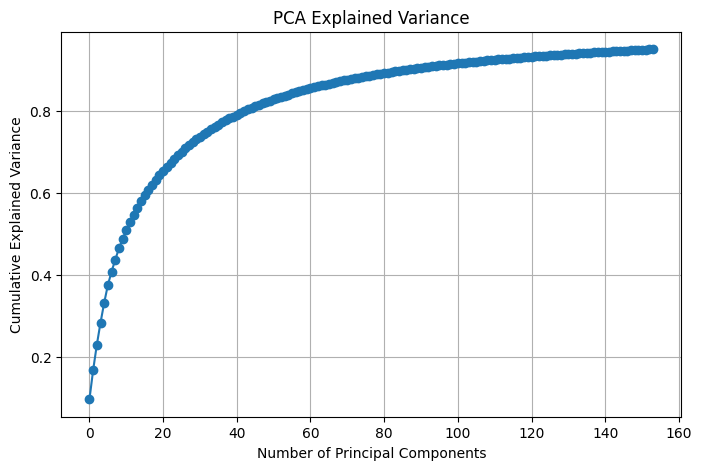

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid()
plt.show()